In [173]:
# Data manipulation
import pandas as pd # data manipulation and dataframes

# Data visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
# Pandas configuration
pd.set_option('display.max_columns', None)  # shows all columns
pd.set_option('display.max_colwidth', None)  # shows all cell content

In [197]:
# Reads csv
airbnb_madrid = pd.read_csv('../raw/eda-result/airbnb_madrid.csv', encoding='utf-8')
listings = pd.read_csv('../raw/airbnb/madrid/listings.csv', encoding='utf-8')

In [198]:
listings.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,Rental unit in Madrid · ★4.87 · 1 bedroom · 1 bed · 1 private bath,13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,90,4,104,2023-05-31,0.65,1,98,9,NaN


In [203]:
len(listings['name'].unique().tolist())

6826

In [176]:
airbnb_madrid.head(1)

,Description,Score,Facilities,District,Neighbourhood,Room type,Price,Minimum nights,Host name,Number of reviews,Last review,Latitude,Longitude
0,Rental unit in madrid,★4.87,"1 bedroom, 1 bed, 1 private bath",Chamartín,Hispanoamérica,Private room,90,4,Simon,104,2023-05-31,40.45724,-3.67688


In [177]:
airbnb_madrid['Last review'] = airbnb_madrid['Last review'].fillna('2023-07-26')

In [178]:
airbnb_madrid["Last review"] = pd.to_datetime(airbnb_madrid["Last review"])
airbnb_madrid['Year'] = airbnb_madrid['Last review'].dt.strftime('%Y')


In [179]:
airbnb_madrid[airbnb_madrid['Last review'].dt.year == 2018].value_counts().sum()

445

In [180]:
airbnb_madrid['Last review'].dt.year.unique().tolist()

[2023, 2018, 2022, 2017, 2021, 2019, 2016, 2012, 2015, 2020, 2014, 2013]

In [181]:
months = airbnb_madrid['Last review'].dt.month.unique().tolist()

In [182]:
airbnb_madrid['Last review'].dt.month[airbnb_madrid['Last review'].dt.year == 2022].value_counts().sum()

2072

In [189]:
total_airbnbs_by_month_2022 = {'Month': [], 'Total Airbnbs 2022': []}

for m in months:
    total_airbnbs_by_month_2022['Month'].append(m)
    total_airbnbs_by_month_2022['Total Airbnbs 2022'].append(airbnb_madrid[(airbnb_madrid['Last review'].dt.year == 2022) & (airbnb_madrid['Last review'].dt.month == m)].value_counts().sum())

total_airbnbs_by_month_2023 = {'Month': [], 'Total Airbnbs 2023': []}

for m in months:
    total_airbnbs_by_month_2023['Month'].append(m)
    total_airbnbs_by_month_2023['Total Airbnbs 2023'].append(airbnb_madrid[(airbnb_madrid['Last review'].dt.year == 2023) & (airbnb_madrid['Last review'].dt.month == m)].value_counts().sum())

In [190]:
total_airbnbs_by_month_2022

{'Month': [5, 7, 6, 9, 4, 12, 8, 11, 1, 2, 3, 10],
 'Total Airbnbs 2022': [112,
  278,
  117,
  227,
  74,
  267,
  271,
  262,
  59,
  44,
  50,
  311]}

In [191]:
total_airbnbs_by_month_2023

{'Month': [5, 7, 6, 9, 4, 12, 8, 11, 1, 2, 3, 10],
 'Total Airbnbs 2023': [6725, 5016, 4040, 0, 1347, 0, 0, 0, 423, 358, 516, 0]}

In [192]:
df2022 = pd.DataFrame.from_dict(total_airbnbs_by_month_2022)
df2022 = df2022.sort_values(by=['Month'])
df2022

,Month,Total Airbnbs 2022
8,1,59
9,2,44
10,3,50
4,4,74
0,5,112
2,6,117
1,7,278
6,8,271
3,9,227
11,10,311


In [193]:
df2023 = pd.DataFrame.from_dict(total_airbnbs_by_month_2023)
df2023 = df2023.sort_values(by=['Month'])
df2023

,Month,Total Airbnbs 2023
8,1,423
9,2,358
10,3,516
4,4,1347
0,5,6725
2,6,4040
1,7,5016
6,8,0
3,9,0
11,10,0


In [134]:
no_cum = df['Total Airbnbs'].tolist()
no_cum

[2, 4, 8, 60, 147, 350, 445, 862, 657, 489, 2072, 18425]

In [137]:
cummy = [sum(no_cum[0:x:1]) for x in range(0, len(no_cum)+1)]
cummy[1:]

[2, 6, 14, 74, 221, 571, 1016, 1878, 2535, 3024, 5096, 23521]

In [140]:
df['Cummulative Sum'] = cummy[1:]

In [141]:
df

,Year,Total Airbnbs,Cummulative Sum
7,2012,2,2
11,2013,4,6
10,2014,8,14
8,2015,60,74
6,2016,147,221
3,2017,350,571
1,2018,445,1016
5,2019,862,1878
9,2020,657,2535
4,2021,489,3024


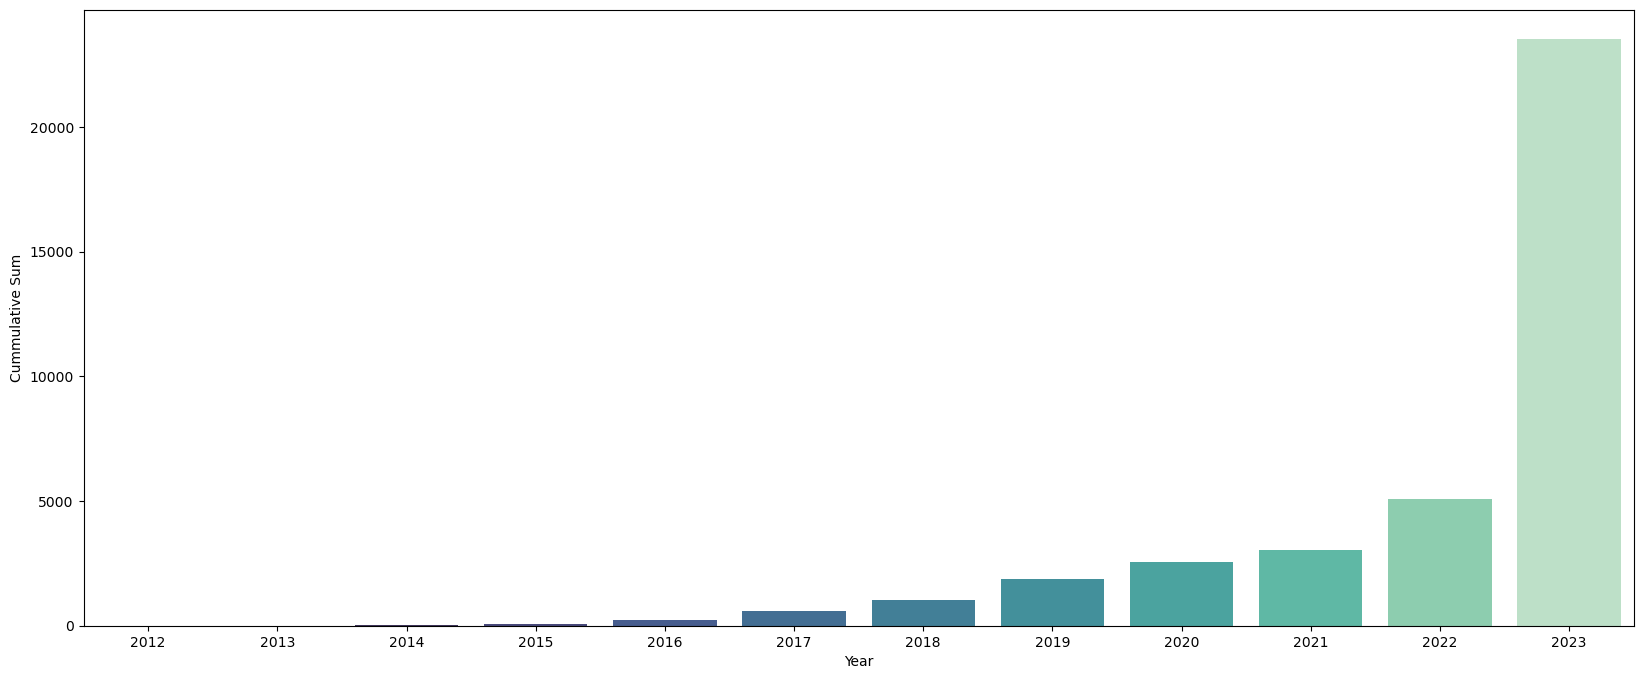

In [142]:
plt.figure(figsize = (20,8))

bar_plot = sns.barplot(x = df['Year'], y = df['Cummulative Sum'], palette= "mako")

plt.show()